In [4]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
env = gym.make('CartPole-v0')




In [ ]:
env.reset()
#random
for i_episode in range(1):
    observation = env.reset()
    for _ in range(100):
        env.render()
        step= env.action_space.sample()
        observation,reward,done,info= env.step(step) # take a random action

        #print(step,observation,reward)
#         if done:
#             print("episode finished after {} timesteps".format(_+1))
#             break
env.close()

In [12]:
class Policy():
    def __init__(self,o_size = 4,a_size = 2):#observe size = 4, action size = 2)
        #Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
        self.w = 1e-4*np.random.rand(o_size,a_size)
    def forward(self,state):
        x = np.dot(state,self.w)
        #exp: Calculate e^x for all elements in the array. e = 2.71828
        return np.exp(x)/sum(np.exp(x))
    def act(self,state):
        probs = self.forward(state)
        #argmax: Returns the indices of the maximum values along an axis.
        action = np.argmax(probs) 
        return action

In [38]:
policy = Policy()
def hill_climbing(n_episode = 1000,max_t = 201, noise_scale = 1e-2, print_every = 50):
    """
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        noise_scale (float): standard deviation of additive noise
        print_every (int): how often to print average score (over last 100 episodes)
    """
    scores_deque = deque(maxlen = 100)
    scores = []
    best_R = -np.Inf
    best_w = policy.w
    for i_episode in range(n_episode):
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action = policy.act(state)
            state,reward,done,info = env.step(action)
            rewards.append(reward)
            if done: #done means failed or step larger than 200
                break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        R = sum(rewards)
        if R>=best_R:#found better weights
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3,noise_scale/2)#noise decrease
            policy.w += noise_scale*np.random.rand(*policy.w.shape) #shpae is (4,2), * is unzip a tuple to 4,2
        else:
            noise_scale = min(2,noise_scale*2)
            policy.w = best_w+noise_scale*np.random.rand(*policy.w.shape)
        if i_episode%print_every ==0:
            print("episode {}\t average score: {}".format(i_episode,np.mean(scores_deque)))
        if np.mean(scores_deque)>195:
            print("Environment solved in {} spisodes".format(i_episode))
            policy.w = best_w
            break
    return scores
        
scores = hill_climbing()

episode 0	 average score: 108.0
episode 50	 average score: 78.90196078431373
episode 100	 average score: 139.16
Environment solved in 137 spisodes


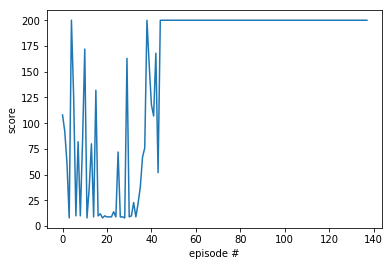

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)),scores)
plt.ylabel("score")
plt.xlabel("episode #")
plt.show()

In [40]:
state = env.reset()
for t in range(200):
    action = policy.act(state)
    env.render()
    state,reward,done,info = env.step(action)
    if done:
        break
env.close()